# Sales Data Analysis : Customer Segmentation and churn prediction

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("sales_superstore.csv.zip")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.shape

(9800, 18)

In [5]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns 

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [9]:
for column in df.columns:
    print(df[column].value_counts())
    print("*"*20)

1       1
6537    1
6530    1
6531    1
6532    1
       ..
3268    1
3269    1
3270    1
3271    1
9800    1
Name: Row ID, Length: 9800, dtype: int64
********************
CA-2018-100111    14
CA-2018-157987    12
CA-2017-165330    11
US-2017-108504    11
CA-2017-105732    10
                  ..
US-2016-110261     1
CA-2016-125710     1
US-2016-137960     1
CA-2016-124975     1
CA-2016-142202     1
Name: Order ID, Length: 4922, dtype: int64
********************
05/09/2017    38
10/11/2017    35
02/12/2018    34
01/12/2018    34
02/09/2018    33
              ..
25/02/2017     1
25/10/2017     1
21/02/2015     1
11/09/2015     1
09/05/2016     1
Name: Order Date, Length: 1230, dtype: int64
********************
26/09/2018    34
06/12/2018    32
16/12/2016    31
15/09/2018    30
06/09/2018    30
              ..
10/07/2015     1
29/03/2016     1
14/06/2016     1
10/01/2018     1
13/05/2016     1
Name: Ship Date, Length: 1326, dtype: int64
********************
Standard Class    5859
Secon

# EDA

# 1. From which area the most of orders are coming

In [10]:
df["Region"].value_counts()#

West       3140
East       2785
Central    2277
South      1598
Name: Region, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='count'>

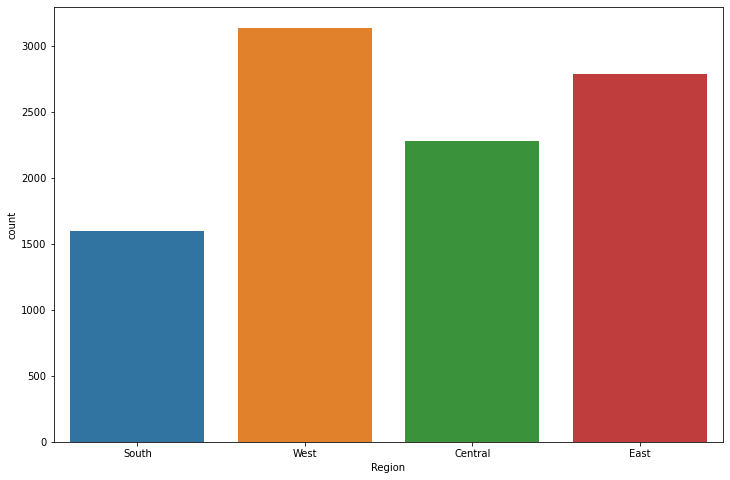

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x="Region")#The people from west order more than other

Most of the orders are from West(3140) then east (2785) and lowest (1598) from south 

# 2.Total Sales by Region: Which region generates the most sales?

In [13]:
df.groupby(["Region"])["Sales"].mean()

Region
Central    216.357889
East       240.401697
South      243.524067
West       226.184613
Name: Sales, dtype: float64

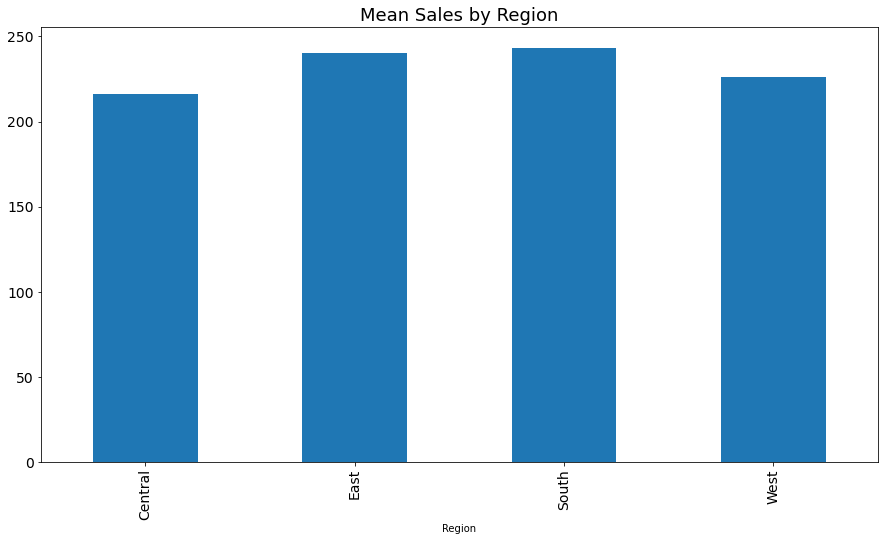

In [14]:
plt.figure(figsize=(15,8))
df.groupby(["Region"])["Sales"].mean().plot(kind="bar")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Mean Sales by Region', fontsize=18)
plt.show()

West region leads with the highest total sales

East follows closely — strong performance, nearly matching the West.

Central and South lag significantly, with the South generating the lowest sales.

## 3.Total Sales by Region: Which State generates the most sales amount ?

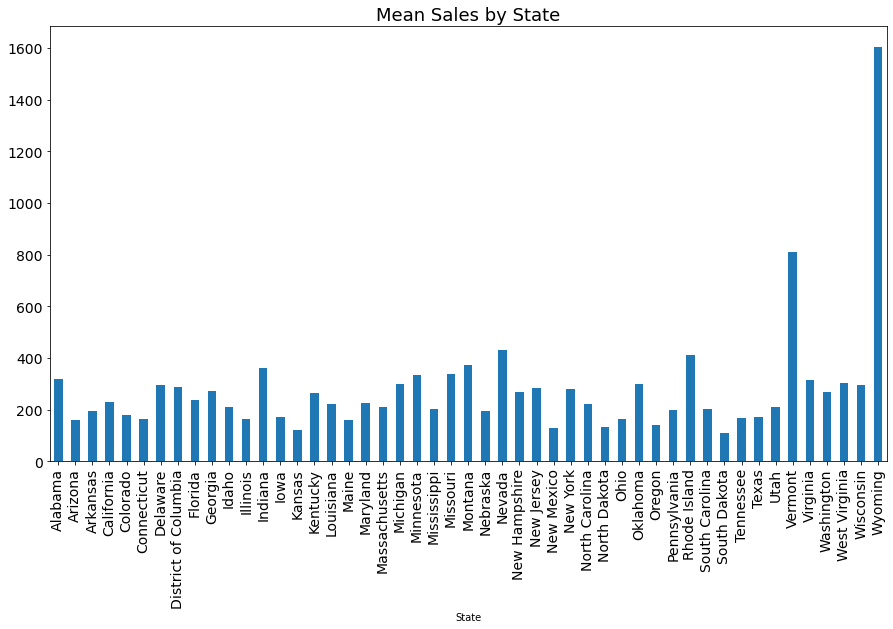

In [15]:
plt.figure(figsize=(15,8))
df.groupby(["State"])["Sales"].mean().plot(kind="bar")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Mean Sales by State', fontsize=18)
plt.show()

## 4.Total Sales by Region: Which region generates the most sales amount ?

City
Jamestown       2354.395000
Cheyenne        1603.136000
Bellingham      1263.413333
Independence    1208.685000
Burbank         1082.386000
Buffalo          906.349600
Burlington       866.723280
Beverly          861.063333
Lafayette        860.147586
Sparks           853.986667
Name: Sales, dtype: float64


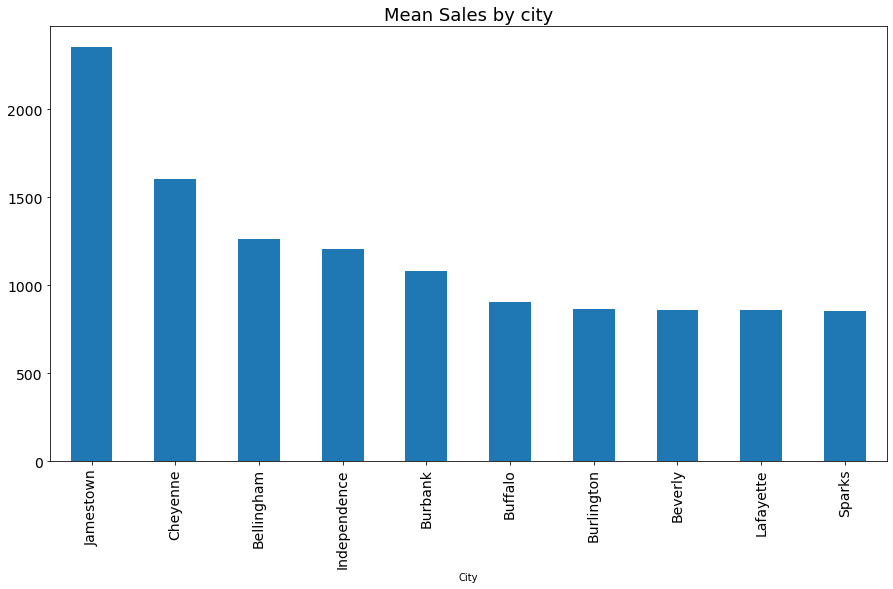

In [16]:
plt.figure(figsize=(15,8))
sales_by_cities = df.groupby(["City"])["Sales"].mean()
top_cities = sales_by_cities.sort_values(ascending=False).head(10)
print(top_cities)
top_cities.plot(kind="bar")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Mean Sales by city', fontsize=18)
plt.show()

## 5. Product Performance: Which products category have the highest/lowest sales amount?

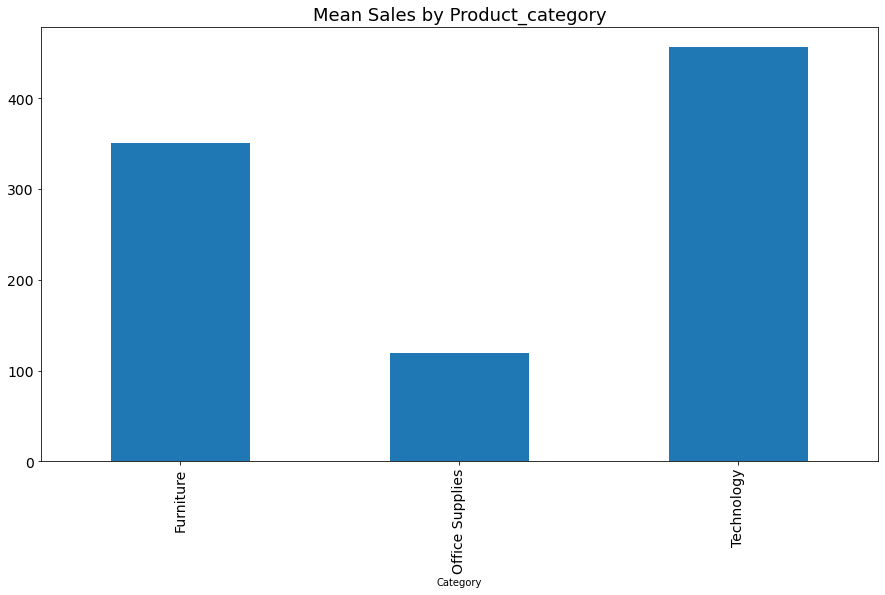

In [17]:
plt.figure(figsize=(15,8))
df.groupby(["Category"])["Sales"].mean().plot(kind="bar")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Mean Sales by Product_category', fontsize=18)
plt.show()

## 6.Product Performance: Which products subcategory have the highest/lowest sales amount?

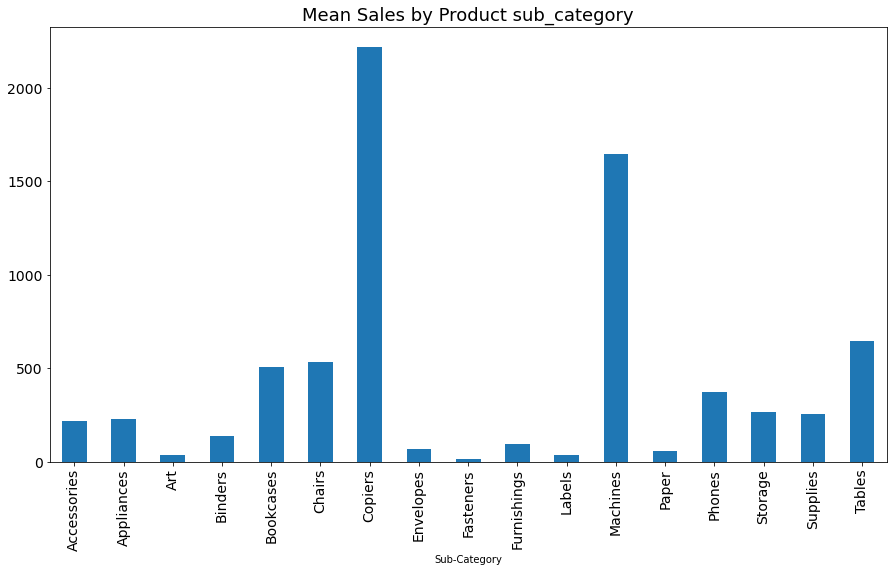

In [18]:
plt.figure(figsize=(15,8))
df.groupby(["Sub-Category"])["Sales"].mean().plot(kind="bar")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Mean Sales by Product sub_category', fontsize=18)
plt.show()

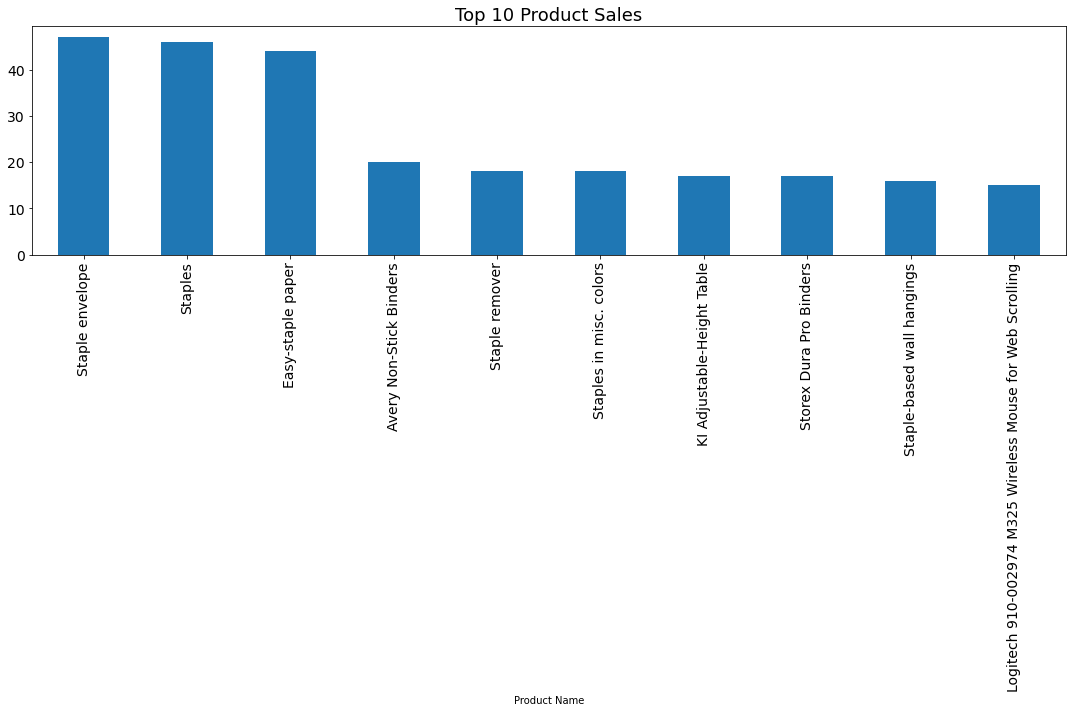

In [19]:
sales_by_products = df.groupby("Product Name").size().sort_values(ascending=False).head(10)
plt.figure(figsize=(15,10))
sales_by_products.plot(kind="bar")
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.title('Top 10 Product Sales', fontsize=18)
plt.tight_layout()
plt.show()

In [20]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format='%d/%m/%Y')
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format='%d/%m/%Y')

In [21]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [22]:
df["days_to_ship"] = (df["Ship Date"]-df["Order Date"]).dt.days 

In [23]:
df["days_to_ship"] .value_counts()

4    2718
5    2147
2    1295
6    1170
3     978
7     615
0     514
1     363
Name: days_to_ship, dtype: int64

<AxesSubplot:>

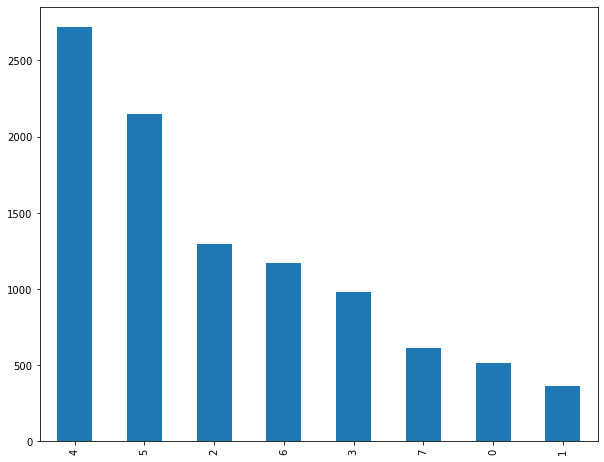

In [24]:
plt.figure(figsize=(10,8))
df["days_to_ship"].value_counts().plot(kind="bar") 

In [25]:
3. Top-Selling Products: Which products have the highest sales volume?
4. Sales Trend Over Time: How do sales change over time ?

SyntaxError: invalid syntax (2420777969.py, line 2)

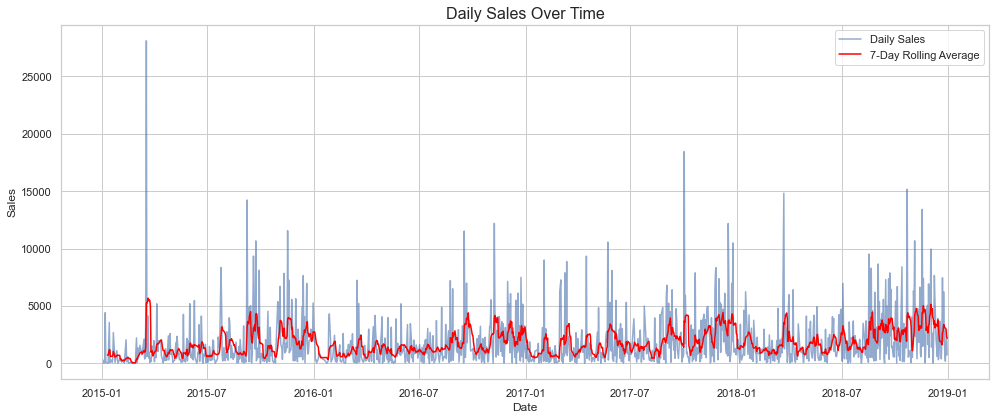

In [26]:
sns.set(style="whitegrid")##############
plt.figure(figsize=(14, 6))

# Group by order date and sum sales
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Sort by date to ensure correct plotting
daily_sales.sort_values('Order Date', inplace=True)

# Plot daily sales
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], label='Daily Sales', alpha=0.6)

# Add rolling average (7-day)
daily_sales['Rolling Avg'] = daily_sales['Sales'].rolling(window=7).mean()
plt.plot(daily_sales['Order Date'], daily_sales['Rolling Avg'], color='red', label='7-Day Rolling Average')

# Titles and labels
plt.title("Daily Sales Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

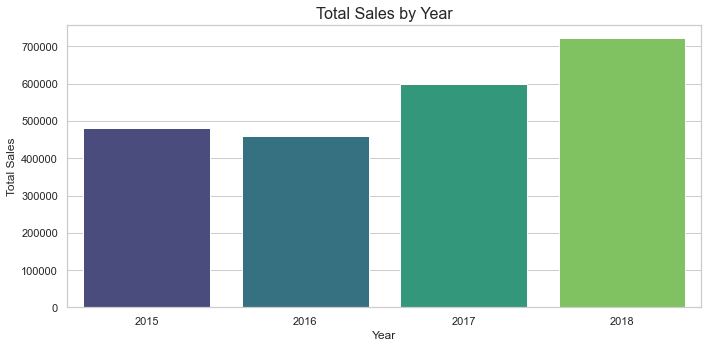

In [27]:
# Extract year from Order Date
df['Year'] = df['Order Date'].dt.year

# Aggregate sales by year
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=yearly_sales, x='Year', y='Sales', palette='viridis')

# Labels and titles
plt.title("Total Sales by Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

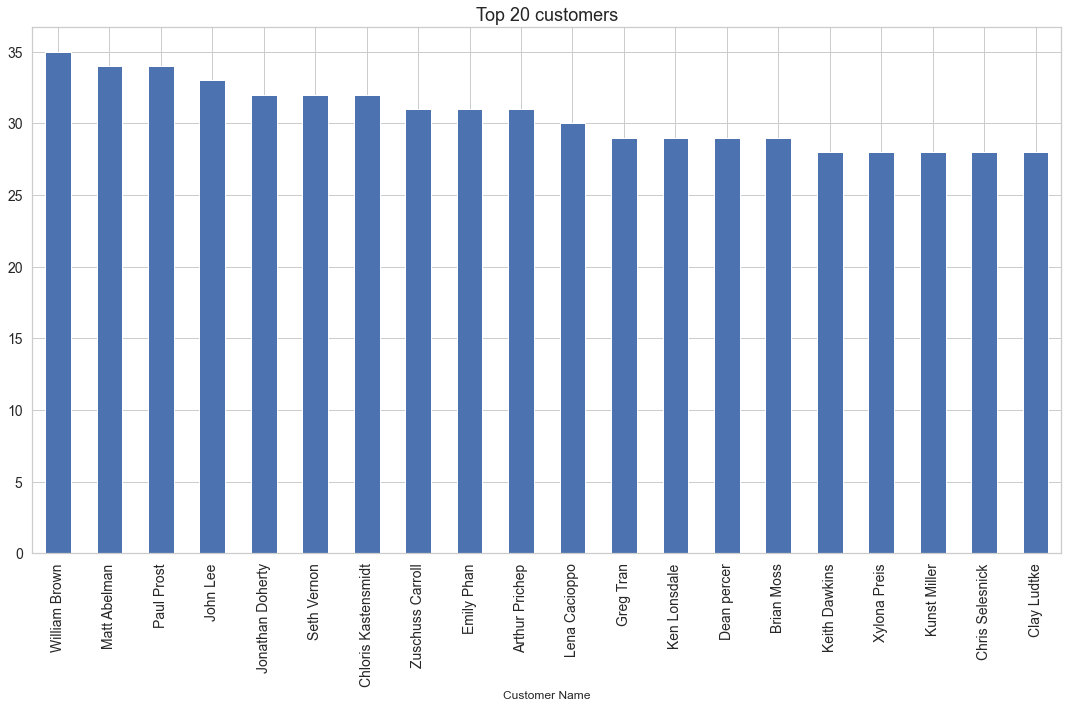

In [28]:
sales_by_products = df.groupby("Customer Name").size().sort_values(ascending=False).head(20)
plt.figure(figsize=(15,10))
sales_by_products.plot(kind="bar")
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.title('Top 20 customers', fontsize=18)
plt.tight_layout()
plt.show()

In [29]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,days_to_ship,Year
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,2017
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,2017
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,2017
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,2016
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,2016


In [30]:
df.shape

(9800, 20)

In [31]:
L = df.groupby("Customer ID").size().sort_values(ascending=False)
L.head(20)

Customer ID
WB-21850    35
PP-18955    34
MA-17560    34
JL-15835    33
CK-12205    32
SV-20365    32
JD-15895    32
AP-10915    31
ZC-21910    31
EP-13915    31
LC-16870    30
Dp-13240    29
BM-11650    29
GT-14710    29
KL-16645    29
CS-12250    28
KM-16720    28
CL-12565    28
KD-16495    28
XP-21865    28
dtype: int64

In [32]:
df["Customer ID"].value_counts()

WB-21850    35
MA-17560    34
PP-18955    34
JL-15835    33
CK-12205    32
            ..
JR-15700     1
CJ-11875     1
SC-20845     1
RE-19405     1
AO-10810     1
Name: Customer ID, Length: 793, dtype: int64

# Modelling

In [33]:
# Calculate RFM metrics
current_date = df['Order Date'].max()  # Most recent order date in data
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (current_date - x.max()).days,  # Recency
    'Order ID': 'count',  # Frequency
    'Sales': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm['R_Score'] = pd.cut(rfm['Recency'], bins=5, labels=[5, 4, 3, 2, 1], include_lowest=True).astype(int)

# For Frequency/Monetary (higher = better)
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=5, labels=[1, 2, 3, 4, 5], include_lowest=True).astype(int)
rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=5, labels=[1, 2, 3, 4, 5], include_lowest=True).astype(int)
# Combine scores into a single RFM score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Segment customers based on RFM score
def segment_customer(row):
    if row['RFM_Score'] >= '555':
        return 'Champion'
    elif row['RFM_Score'] >= '444':
        return 'Loyal'
    elif row['RFM_Score'] >= '333':
        return 'Potential'
    elif row['RFM_Score'] >= '222':
        return 'Needs Attention'
    else:
        return 'At Risk'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

print(rfm.sort_values(by='RFM_Score', ascending=False))

    CustomerID  Recency  Frequency    Monetary  R_Score  F_Score  M_Score  \
311   GT-14710       36         29  11820.1200        5        5        3   
720   SV-20365      101         32  11470.9500        5        5        3   
434   KL-16645       47         29  14175.2290        5        5        3   
275   EP-13915       12         31   5478.0608        5        5        2   
92    BM-11650       33         29   7294.1850        5        5        2   
..         ...      ...        ...         ...      ...      ...      ...   
163   CM-12715     1034         13   3984.4524        1        2        1   
785   VT-21700      999          9   1736.5960        1        2        1   
552   NB-18580     1165          2    273.8720        1        1        1   
309   GR-14560     1135          5   1284.3800        1        1        1   
637   RE-19405     1097          1     48.3600        1        1        1   

    RFM_Score  Segment  
311       553    Loyal  
720       553    Loyal  


In [34]:
rfm['Segment'].value_counts()

Loyal              639
Potential           95
Needs Attention     38
At Risk             21
Name: Segment, dtype: int64

In [39]:
rfm[rfm["Segment"]=="At Risk"]

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
23,AG-10525,844,9,1455.0380,2,2,1,221,At Risk
137,CC-12685,798,12,2854.1150,2,2,1,221,At Risk
155,CM-11935,707,4,565.3920,2,1,1,211,At Risk
163,CM-12715,1034,13,3984.4524,1,2,1,121,At Risk
202,DE-13255,718,9,2550.8740,2,2,1,221,At Risk
206,DH-13675,775,11,1043.0960,2,2,1,221,At Risk
231,DP-13165,811,4,1058.6160,2,1,1,211,At Risk
308,GP-14740,764,5,236.5300,2,1,1,211,At Risk
309,GR-14560,1135,5,1284.3800,1,1,1,111,At Risk
318,HD-14785,768,7,251.3600,2,1,1,211,At Risk


In [ ]:
# Calculate repeat purchases
repeat_purchases = df.groupby('Customer ID').size().reset_index(name='Purchase Count')
repeat_purchases = repeat_purchases[repeat_purchases['Purchase Count'] > 1]

# Calculate customer retention rate
customer_retention_rate = len(repeat_purchases) / len(df['Customer ID'].unique())

print(f'Customer Retention Rate: {customer_retention_rate:.2%}')

#Retention Rate is a metric that measures the percentage of customers, users, or individuals who continue to engage with a 
#product, service, or platform over a specific period of time. It's a key indicator of customer satisfaction, loyalty, and the 
#overall health of a business.



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot segment counts
plt.figure(figsize=(12, 8))
sns.countplot(data=rfm, x='Segment', order=['Champion', 'Loyal', 'Potential', 'Needs Attention', 'At Risk'])
plt.title('Customer Distribution by RFM Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment', 
                palette={'Champion': 'green', 'Loyal': 'blue', 'Potential': 'orange', 
                        'Needs Attention': 'yellow', 'At Risk': 'red'})
plt.title('Recency vs. Frequency by Segment')
plt.show()

In [ ]:
# Calculate average R/F/M per segment
segment_avg = rfm.groupby('Segment')[['R_Score', 'F_Score', 'M_Score']].mean()

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(segment_avg, annot=True, cmap='YlGnBu')
plt.title('Average RFM Scores by Segment')
plt.show()

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your RFM data (replace with your actual data
# Define churn: Customers with Recency > threshold (e.g., 365 days)
churn_threshold = 365
rfm['Churn'] = (rfm['Recency'] > churn_threshold).astype(int)  # 1=Churned, 0=Active

features = ['R_Score', 'F_Score', 'M_Score']  
X = rfm[features]
y = rfm['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
rfm[rfm['Churn']==0]

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Churn
0,AA-10315,184,11,5563.560,5,2,2,522,Loyal,0
1,AA-10375,19,15,1056.390,5,3,1,531,Loyal,0
2,AA-10480,259,12,1790.512,4,2,1,421,Potential,0
3,AA-10645,55,18,5086.935,5,3,2,532,Loyal,0
5,AB-10060,54,18,7755.620,5,3,2,532,Loyal,0
...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,43,28,2374.658,5,4,1,541,Loyal,0
789,YC-21895,4,8,5454.350,5,2,2,522,Loyal,0
790,YS-21880,9,12,6720.444,5,2,2,522,Loyal,0
791,ZC-21910,54,31,8025.707,5,5,2,552,Loyal,0


([<matplotlib.patches.Wedge at 0x15f6aa0efd0>,
 [Text(-1.0114071600757624, 0.43249919832004485, ''),
  Text(1.0114071803225098, -0.4324991509726583, '')])

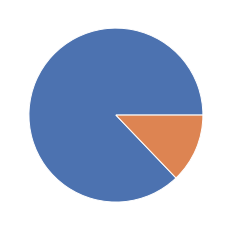

In [46]:
plt.pie(rfm["Churn"].value_counts())
plt.show()

In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train model
model = XGBClassifier(scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))  # Handles class imbalance
model.fit(X_train, y_train)

# Predictions
y_pred1 = model.predict(X_test)


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
conf_mat = confusion_matrix(y_test, y_pred1)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_mat)

Accuracy: 0.9243697478991597
Precision: 0.6136363636363636
Recall: 0.9642857142857143
F1-score: 0.75
Confusion Matrix:
 [[193  17]
 [  1  27]]


In [61]:
from sklearn.ensemble import RandomForestClassifier
# Train
rf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()  
lr.fit(X_train, y_train)

# Evaluate
y_pred2 = lr.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
conf_mat = confusion_matrix(y_test, y_pred2)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_mat)

Accuracy: 0.9495798319327731
Precision: 1.0
Recall: 0.5714285714285714
F1-score: 0.7272727272727273
Confusion Matrix:
 [[210   0]
 [ 12  16]]


In [64]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)
y_pred3 = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)
conf_mat = confusion_matrix(y_test, y_pred3)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_mat)


Accuracy: 0.9411764705882353
Precision: 0.71875
Recall: 0.8214285714285714
F1-score: 0.7666666666666667
Confusion Matrix:
 [[201   9]
 [  5  23]]


# Conclusion

Sales Performance by Region and State: The West region generates the most orders, followed by the East.
However, when looking at mean sales per region, the South region leads, followed closely by the East, while Central and West lag behind. This suggests that while the West has a high volume of orders, the average value of those orders might be lower compared to the South and East.
Wyoming and Virginia appear to have the highest mean sales per state.
Sales Performance by City:Jamestown leads in mean sales per city*, significantly higher than other cities like Cheyenne and Bellingham.
Product Category and Sub-Category Performance:Technology products have the highest mean sales, followed by Furniture, with Office Supplies having the lowest mean sales Within sub-categories, Copiers and Machines show the highest mean sales.
Top-Selling Products:"Staples" is the most frequently purchased product.
Sales Trend Over Time:The overall sales trend shows a mild upward trajectory over a four-year period, with increased sales activity observed in the latter half of the dataset (2017-2018) compared to earlier years (2015-2016).Recurring sales spikes are noted around year-end (Q4), likely due to holiday seasons, and some mid-year spikes (June-July) could indicate promotions.
Customer Segmentation (RFM):
The majority of customers are classified as "Loyal" (639 customers), followed by "Potential" (95 customers), "Needs Attention" (38 customers), and "At Risk" (21 customers).There are no "Champion" customers identified in this segmentation.
"At Risk" customers are those with a high recency score (meaning they haven't purchased recently) but also low frequency and monetary scores.
Customer Retention: The customer retention rate is approximately 80.45%** (638 out of 793 unique customers made repeat purchases)This indicates a relatively healthy base of returning customers.
Churn Prediction:A churn prediction model was developed using RFM scores as features.
   The XGBoost Classifier achieved an **accuracy of 92.44%**, a precision of 61.36%, and a recall of 96.43%.
   The Random Forest Classifier achieved an **accuracy of 94.96%**, a precision of 100%, and a recall of 57.14%.
   The Logistic Regression model achieved an accuracy of 94.12%, a precision of 71.88%, and a recall of 82.14%.
